In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

tabla_nutricional.fillna(0, inplace=True)

cols = tabla_nutricional.columns
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col]
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional.head(57)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.420,8.370,7.830,0.00,4.990,2.190,0.520,0.00,0.153900,0.28350,0.000189
1,Leche entera en polvo,11.00,4.510,2.840,2.730,0.00,1.620,0.770,0.060,0.00,0.044440,0.09900,0.000060
2,Yogurt,19.00,2.450,0.510,0.490,0.00,0.320,0.140,0.014,0.00,0.007990,0.01767,0.000005
3,Queso crema,1.66,0.060,0.100,0.370,0.00,0.360,0.110,0.010,0.00,0.001230,0.00093,0.000000
4,Queso cuartirolo,3.66,0.060,0.770,0.800,0.00,0.760,0.210,0.020,0.00,0.020840,0.01654,0.000000
5,Queso rallar,1.66,0.060,0.550,0.450,0.00,0.360,0.110,0.008,0.00,0.020420,0.01578,0.000000
6,Huevo,16.00,0.000,1.920,1.890,0.00,0.510,0.720,0.460,0.00,0.021600,0.00896,0.000400
7,Asado,50.00,0.000,9.300,7.500,0.00,2.930,3.270,0.189,0.00,0.033000,0.00750,0.001120
8,Paleta,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340
9,Hueso c/carne,15.00,0.000,3.000,1.500,0.00,0.880,0.980,0.056,0.00,0.009900,0.00180,0.000340


In [10]:
def eval_oms (a:pd.DataFrame):
    cantidad= a['Cantidad (gr/ml)'].sum()
    hidratosDeCarbono=a['HC (gr)'].sum()*100/cantidad
    proteinas=a['Proteinas (gr)'].sum()*100/cantidad
    grasas=a['Grasas (gr)'].sum()*100/cantidad
    azucaresL=a['Azucares Libres (gr)'].sum()*100/cantidad
    ags=a['AGS (gr)'].sum()*100/cantidad
    agni=a['AGNI (gr)'].sum()*100/cantidad
    agP=a['AG p (gr)'].sum()*100/cantidad
    fibra=a['Fibra (gr)'].sum()
    sodio=a['Na (gr)'].sum()*100/cantidad
    calcio=a['Ca (gr)'].sum()*100/cantidad
    hierro=a['Fe (gr)'].sum()*100/cantidad
    lista_fru_ver=['Acelga', 'Banana', 'Batata', 'Cebolla', 'Mandarina', 'Lechuga', 'Manzana', 'Naranja', 'Papa', 'Pera' , 'Tomate', 'Zanahoria', 'Zapallo' ]
    cantidadFD=a[a['Alimento'].isin(lista_fru_ver)]['Cantidad (gr/ml)'].sum()

    return 55< hidratosDeCarbono < 75 and 10 < proteinas < 15 and  15 < grasas < 30 and azucaresL<10 and ags <10 and fibra >25 and 0.16 < sodio < 0.24 and cantidadFD >= 400


eval_oms(tabla_nutricional)    

False

In [15]:
def calculoACP_por_fila(df: pd.DataFrame):
    nombres = df.iloc[:, 0].values  # Extraer los nombres
    datos = df.iloc[:, 1:].values   # Extraer los datos numéricos
    
    # Centrar los datos por filas
    datos_centrados = datos - np.mean(datos, axis=1, keepdims=True)
    
    # Calcular la matriz de covarianza de los datos centrados transpuestos
    Mcov = np.cov(datos_centrados.T)
    
    # Calcular los valores y vectores propios
    D, V = np.linalg.eigh(Mcov)
    
    # Ordenar los valores y vectores propios en orden descendente
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]
    
    # Calcular la varianza explicada
    varianza_explicada = D / np.sum(D)
    
    return D, V, datos_centrados, varianza_explicada, nombres

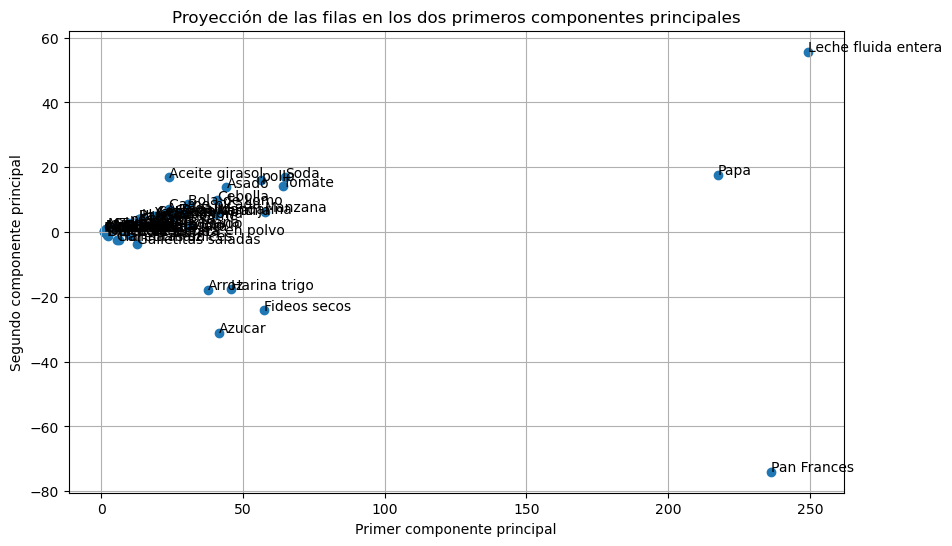

In [31]:
def graficar_componentes_principales(df: pd.DataFrame):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los dos primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :2])
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(proyecciones[:, 0], proyecciones[:, 1])
    
    for i, nombre in enumerate(nombres):
        plt.annotate(nombre, (proyecciones[i, 0], proyecciones[i, 1]))
    
    plt.title('Proyección de las filas en los dos primeros componentes principales')
    plt.xlabel('Primer componente principal')
    plt.ylabel('Segundo componente principal')
    plt.grid()
    plt.show()

graficar_componentes_principales(tabla_nutricional)

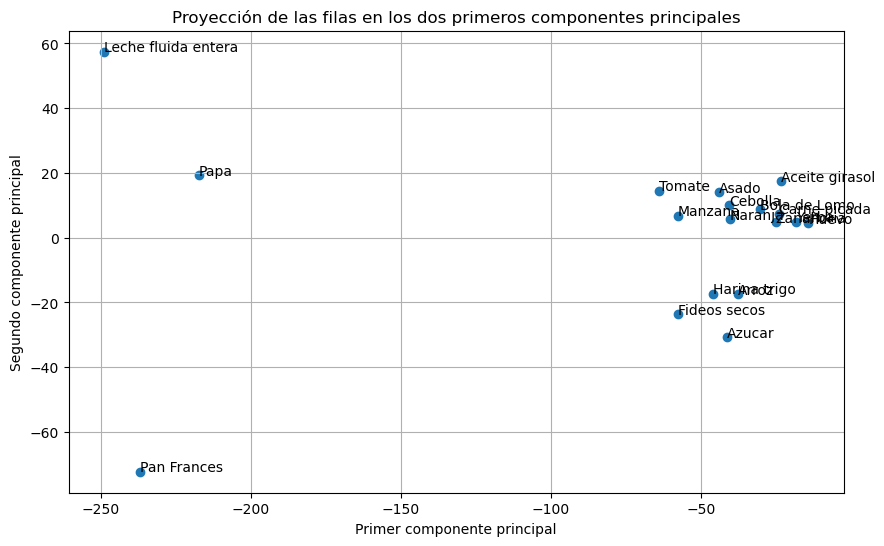

In [32]:
#Hay alimentos de esta lista q no estan en la canasta basica y hay otros a los q habria q ponerles otro nombre tipo el azucar q aca se llama azucar ledesma.
nombres_productos=['Aceite girasol', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo', 'Leche fluida entera', 'Manzana', 'Naranja', 'Paleta', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']

def filtrar_dataframe(df: pd.DataFrame, lista: list):
    df_filtrado = df[df.iloc[:, 0].isin(lista)]
    return df_filtrado
 
graficar_componentes_principales(filtrar_dataframe(tabla_nutricional, nombres_productos))
#Aca hice el ACP teniendo en cuenta solo los valores de los componentes q estan en la tabla de consumidores libres y cambian los resultados porque se calcula sobre un dataframe mucho mas reducido.

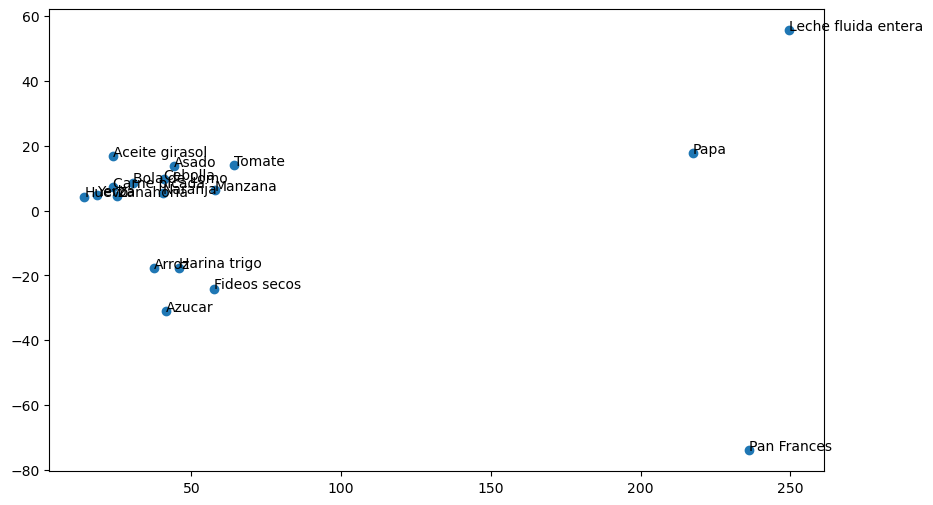

In [35]:


def graficar_componentes_principales(df: pd.DataFrame, lista: list):
    D, V, datos_centrados, varianza_explicada, nombres = calculoACP_por_fila(df)
    
    # Proyectar los datos centrados en los dos primeros componentes principales
    proyecciones = np.dot(datos_centrados, V[:, :2])
    
    # Filtrar las proyecciones para incluir solo los nombres en la lista
    mask = np.isin(nombres, lista)
    proyecciones_filtradas = proyecciones[mask]
    nombres_filtrados = nombres[mask]
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(proyecciones_filtradas[:, 0], proyecciones_filtradas[:, 1])
    
    for i, nombre in enumerate(nombres_filtrados):
        plt.annotate(nombre, (proyecciones_filtradas[i, 0], proyecciones_filtradas[i, 1]))

graficar_componentes_principales(tabla_nutricional, nombres_productos)